# Location-based Analysis

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('Dataset .csv')

In [23]:
for i in data.columns:
    print(f"{i}: {data[i].isna().sum()}")

Restaurant ID: 0
Restaurant Name: 0
Country Code: 0
City: 0
Address: 0
Locality: 0
Locality Verbose: 0
Longitude: 0
Latitude: 0
Cuisines: 9
Average Cost for two: 0
Currency: 0
Has Table booking: 0
Has Online delivery: 0
Is delivering now: 0
Switch to order menu: 0
Price range: 0
Aggregate rating: 0
Rating color: 0
Rating text: 0
Votes: 0


In [24]:
data = data.dropna()

## Coordinates of restaurants along with visualization of their distribution in a map

In [19]:
import folium

map_center = [14.554729, 121.024445]  # Example coordinates for the city center
map = folium.Map(location=map_center, zoom_start=12, tiles='OpenStreetMap')


for index, row in data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,  # Size of the dot
        color='blue',  # Color of the circle's edge
        fill=True,
        fill_color='blue',  # Color of the fill inside the circle
        fill_opacity=0.1,  # Opacity of the fill
        popup=f"{row['Restaurant Name']} - {row['Cuisines']} - Rating: {row['Aggregate rating']}"
    ).add_to(map)

# Save the map to an HTML file
map.save('restaurants_map.html')





### This map contains the concentration of resturants in differnet areas around the world

In [20]:
from IPython.display import IFrame

# Display the map in the notebook
IFrame('restaurants_map.html', width=800, height=600)
# You can zoom in or out to see the locations and concentration of resturants in a locality.

## Concentration of resturants in different locality
place=True)


In [26]:
# Group by City and Locality
city_grouped = data.groupby(['City', 'Locality']).agg({
    'Restaurant ID': 'count',
    'Aggregate rating': 'mean',
    'Price range': 'mean',
    'Cuisines': lambda x: ', '.join(set(x))
}).reset_index()


city_grouped.columns = ['City', 'Locality', 'Restaurant Count', 'Avg Rating', 'Avg Price Range', 'Cuisines']

city_grouped.sort_values('Restaurant Count', ascending=False, inplace=True)

In [27]:
city_grouped

,City,Locality,Restaurant Count,Avg Rating,Avg Price Range,Cuisines
711,New Delhi,Connaught Place,122,3.686885,2.598361,"Tea, Fast Food, Burger, Chinese, North Indian,..."
859,New Delhi,Rajouri Garden,99,3.591919,2.202020,"Continental, Italian, Mediterranean, Asian, Th..."
872,New Delhi,Shahdara,87,1.413793,1.137931,"Bakery, Desserts, North Indian, South Indian, ..."
724,New Delhi,Defence Colony,86,3.210465,1.930233,"Bakery, Desserts, Lebanese, Arabian, Chinese, ..."
845,New Delhi,Pitampura,85,2.870588,1.470588,"Bakery, Desserts, North Indian, Chinese, Conti..."
...,...,...,...,...,...,...
312,Faridabad,Sector 30,1,0.000000,1.000000,"Chinese, Fast Food"
301,Faridabad,"SRS Mall, Sector 12, Faridabad",1,0.000000,1.000000,Fast Food
299,Faridabad,"Park Plaza, Sector 21, Faridabad",1,3.000000,3.000000,Bakery
297,Faridabad,K Hotel,1,0.000000,3.000000,"North Indian, Chinese, Continental"


In [57]:
import pandas as pd

summary_list = []

# Highest and lowest restaurant concentration
highest_restaurant_city = city_grouped.loc[city_grouped['Restaurant Count'].idxmax()]
lowest_restaurant_city = city_grouped.loc[city_grouped['Restaurant Count'].idxmin()]

summary_list.append({
    'Metric': 'Highest Restaurant Concentration',
    'City': highest_restaurant_city['City'],
    'Value': highest_restaurant_city['Restaurant Count']
})

summary_list.append({
    'Metric': 'Lowest Restaurant Concentration',
    'City': lowest_restaurant_city['City'],
    'Value': lowest_restaurant_city['Restaurant Count']
})

# Highest and lowest average ratings
highest_rating_city = city_grouped.loc[city_grouped['Avg Rating'].idxmax()]
lowest_rating_city = city_grouped.loc[city_grouped['Avg Rating'].idxmin()]

summary_list.append({
    'Metric': 'Highest Rating',
    'City': highest_rating_city['City'],
    'Value': highest_rating_city['Avg Rating']
})

summary_list.append({
    'Metric': 'Lowest Rating',
    'City': lowest_rating_city['City'],
    'Value': lowest_rating_city['Avg Rating']
})

# Highest and lowest average price range
highest_price_city = city_grouped.loc[city_grouped['Avg Price Range'].idxmax()]
lowest_price_city = city_grouped.loc[city_grouped['Avg Price Range'].idxmin()]

summary_list.append({
    'Metric': 'Highest Avg Price Range',
    'City': highest_price_city['City'],
    'Value': highest_price_city['Avg Price Range']
})

summary_list.append({
    'Metric': 'Lowest Avg Price Range',
    'City': lowest_price_city['City'],
    'Value': lowest_price_city['Avg Price Range']
})

# Convert the summary list to a DataFrame
summary_table = pd.DataFrame(summary_list)


print(summary_table)


                             Metric            City        Value
0  Highest Restaurant Concentration       New Delhi  5473.000000
1   Lowest Restaurant Concentration         Tanunda     1.000000
2                    Highest Rating      Inner City     4.900000
3                     Lowest Rating       Faridabad     1.866932
4           Highest Avg Price Range    Johannesburg     4.000000
5            Lowest Avg Price Range  Lakes Entrance     1.000000


### The above table contains various statistics about the cities with highest rated restutrants, value for money and concentrations

In [45]:
# Group by City only
city_grouped = data.groupby('City').agg({
    'Restaurant ID': 'count',
    'Aggregate rating': 'mean',
    'Price range': 'mean',
    'Latitude': 'max',
    'Longitude': 'max'}).reset_index()


city_grouped.columns = ['City', 'Restaurant Count', 'Avg Rating', 'Avg Price Range', 'Latitude', 'Longitude']


city_grouped.sort_values('Restaurant Count', ascending=False, inplace=True)


city_grouped



,City,Restaurant Count,Avg Rating,Avg Price Range,Latitude,Longitude
87,New Delhi,5473,2.438845,1.621597,35.000000,77.339139
50,Gurgaon,1118,2.651431,1.855993,28.521692,77.152958
88,Noida,1080,2.036204,1.601852,28.629225,77.529672
43,Faridabad,251,1.866932,1.454183,28.500640,77.342322
48,Ghaziabad,25,2.852000,1.800000,28.669858,77.378751
...,...,...,...,...,...,...
108,Randburg,1,4.300000,3.000000,-26.140260,27.991791
71,Macedon,1,3.500000,2.000000,-37.423189,144.564174
68,Lorn,1,3.600000,2.000000,-32.728097,151.558475
66,Lincoln,1,4.500000,2.000000,40.814300,-96.707200


In [48]:
import folium

# Define a function to determine color based on average rating
def get_color(avg_rating):
    if avg_rating >= 4:
        return 'darkgreen'  # Excellent
    elif avg_rating >= 3:
        return 'green'      # Very Good
    elif avg_rating >= 2:
        return 'yellow'     # Good
    elif avg_rating >= 1:
        return 'orange'     # Average
    else:
        return 'red'        # Poor

# Create a base map centered around a location (adjust as needed)
map_center = [14.554729, 121.024445]  # Example coordinates for the city center
map = folium.Map(location=map_center, zoom_start=12)

# Add circle markers for each city based on average rating
for index, row in city_grouped.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,  # Adjust size as necessary
        color=get_color(row['Avg Rating']),
        fill=True,
        fill_color=get_color(row['Avg Rating']),
        fill_opacity=0.2,
        popup=f"{row['City']} - Avg Rating: {row['Avg Rating']}"
    ).add_to(map)

# Save the map to an HTML file
map.save('city_ratings_map.html')


### The below map contains the city locations along with a color code to get the average rated resturants in each city
#### Here the ratings are as follows : Dark green > Green > Yellow > Orange > Red

In [49]:
from IPython.display import IFrame

# Display the map in the notebook
IFrame('city_ratings_map.html', width=800, height=600)
# You can zoom in or out to see the locations and concentration of resturants in a locality.

##  Statistical Analysis by City/Locality

In [58]:
# Average ratings by city
avg_rating_by_city = data.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# Popular cuisines by city
cuisines_by_city = data.groupby('City')['Cuisines'].apply(lambda x: x.value_counts().idxmax())

# Price range distribution
price_range_by_city = data.groupby('City')['Price range'].mean().sort_values(ascending=True)


In [59]:
print(f'Average ratings by cities are as follows: {avg_rating_by_city}')

Average ratings by cities are as follows: City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 140, dtype: float64


In [61]:
print(f'Cuisines by cities are as follows: {cuisines_by_city}')

Cuisines by cities are as follows: City
Abu Dhabi                                                   American
Agra                                           North Indian, Mughlai
Ahmedabad          Chinese, Italian, North Indian, Mexican, Medit...
Albany                                        Japanese, Steak, Sushi
Allahabad                                      North Indian, Chinese
                                         ...                        
Weirton                                      Burger, Greek, Sandwich
Wellington City                                                 Cafe
Winchester Bay                                Burger, Seafood, Steak
Yorkton                                                        Asian
��stanbul                                                       Cafe
Name: Cuisines, Length: 140, dtype: object


In [62]:
print(f'Price range by cities are as follows: {price_range_by_city}')

Price range by cities are as follows: City
Dicky Beach         1.0
Lakeview            1.0
Lakes Entrance      1.0
Fernley             1.0
Clatskanie          1.0
                   ... 
Inner City          4.0
Vineland Station    4.0
Princeton           4.0
Paynesville         4.0
Panchkula           4.0
Name: Price range, Length: 140, dtype: float64


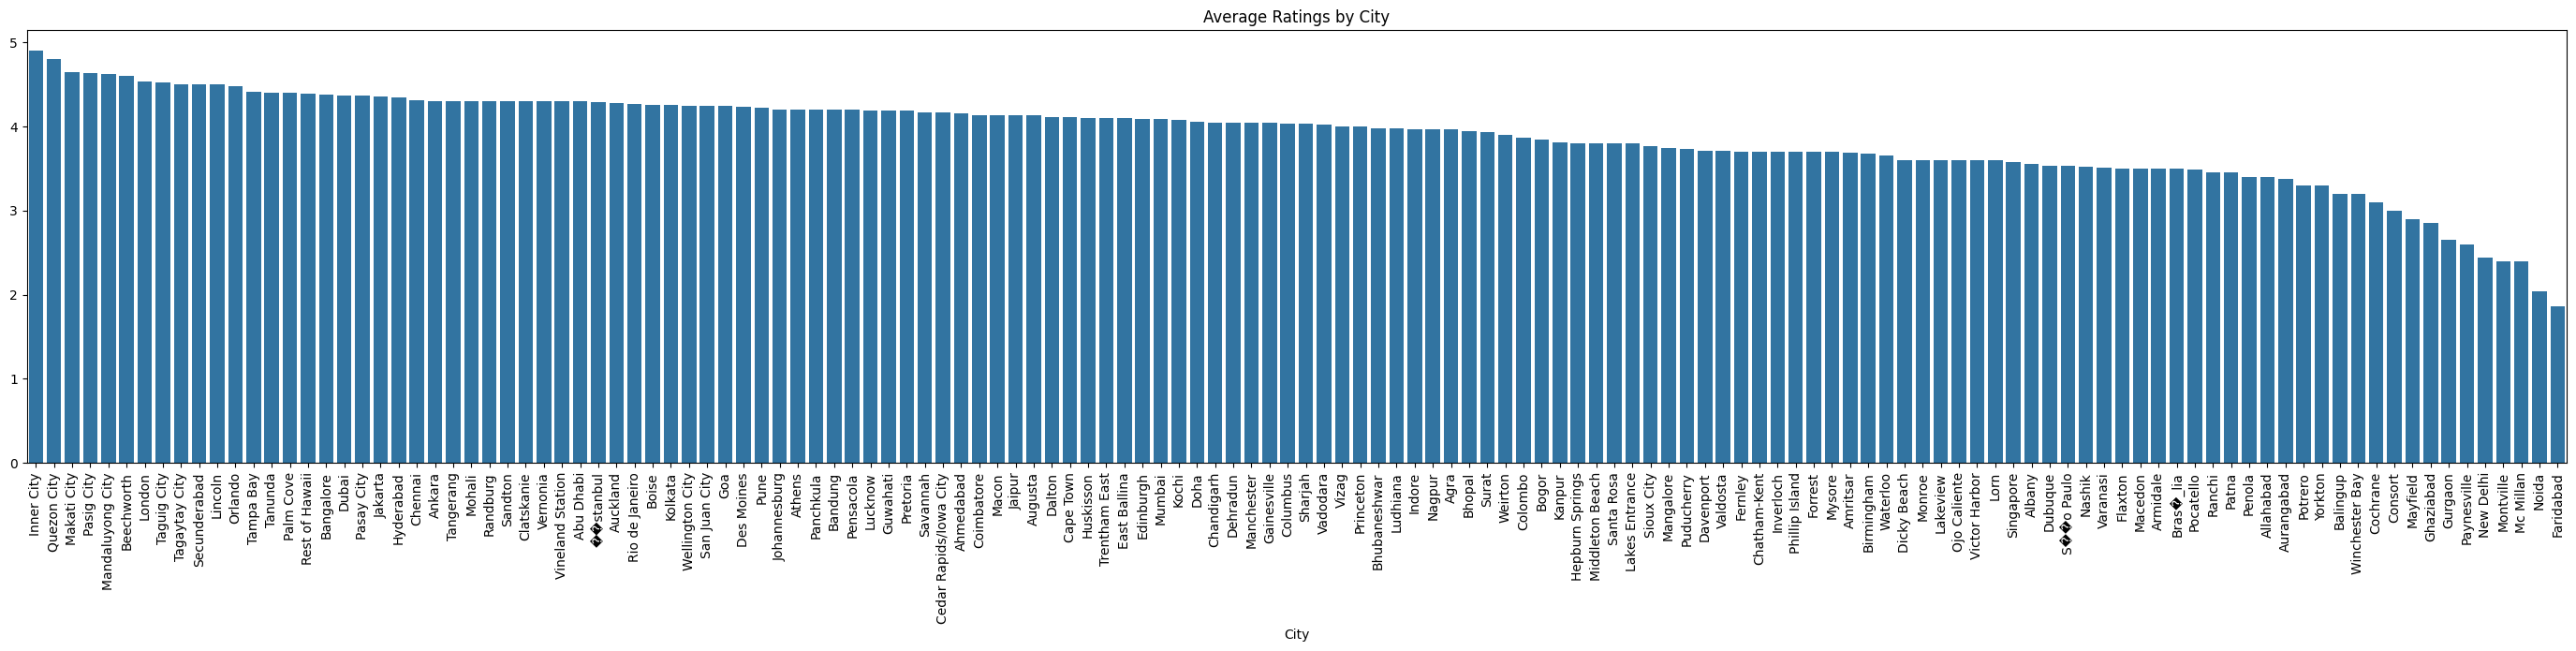

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the average ratings by city
plt.figure(figsize=(35, 6))
sns.barplot(x=avg_rating_by_city.index, y=avg_rating_by_city.values)
plt.xticks(rotation=90)
plt.title('Average Ratings by City')
plt.show()


C:\Users\nisha\AppData\Local\Temp\ipykernel_20776\1467848546.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_grouped, x='Restaurant Count', y='City', palette='viridis')
C:\Users\nisha\PycharmProjects\pythonProject1\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


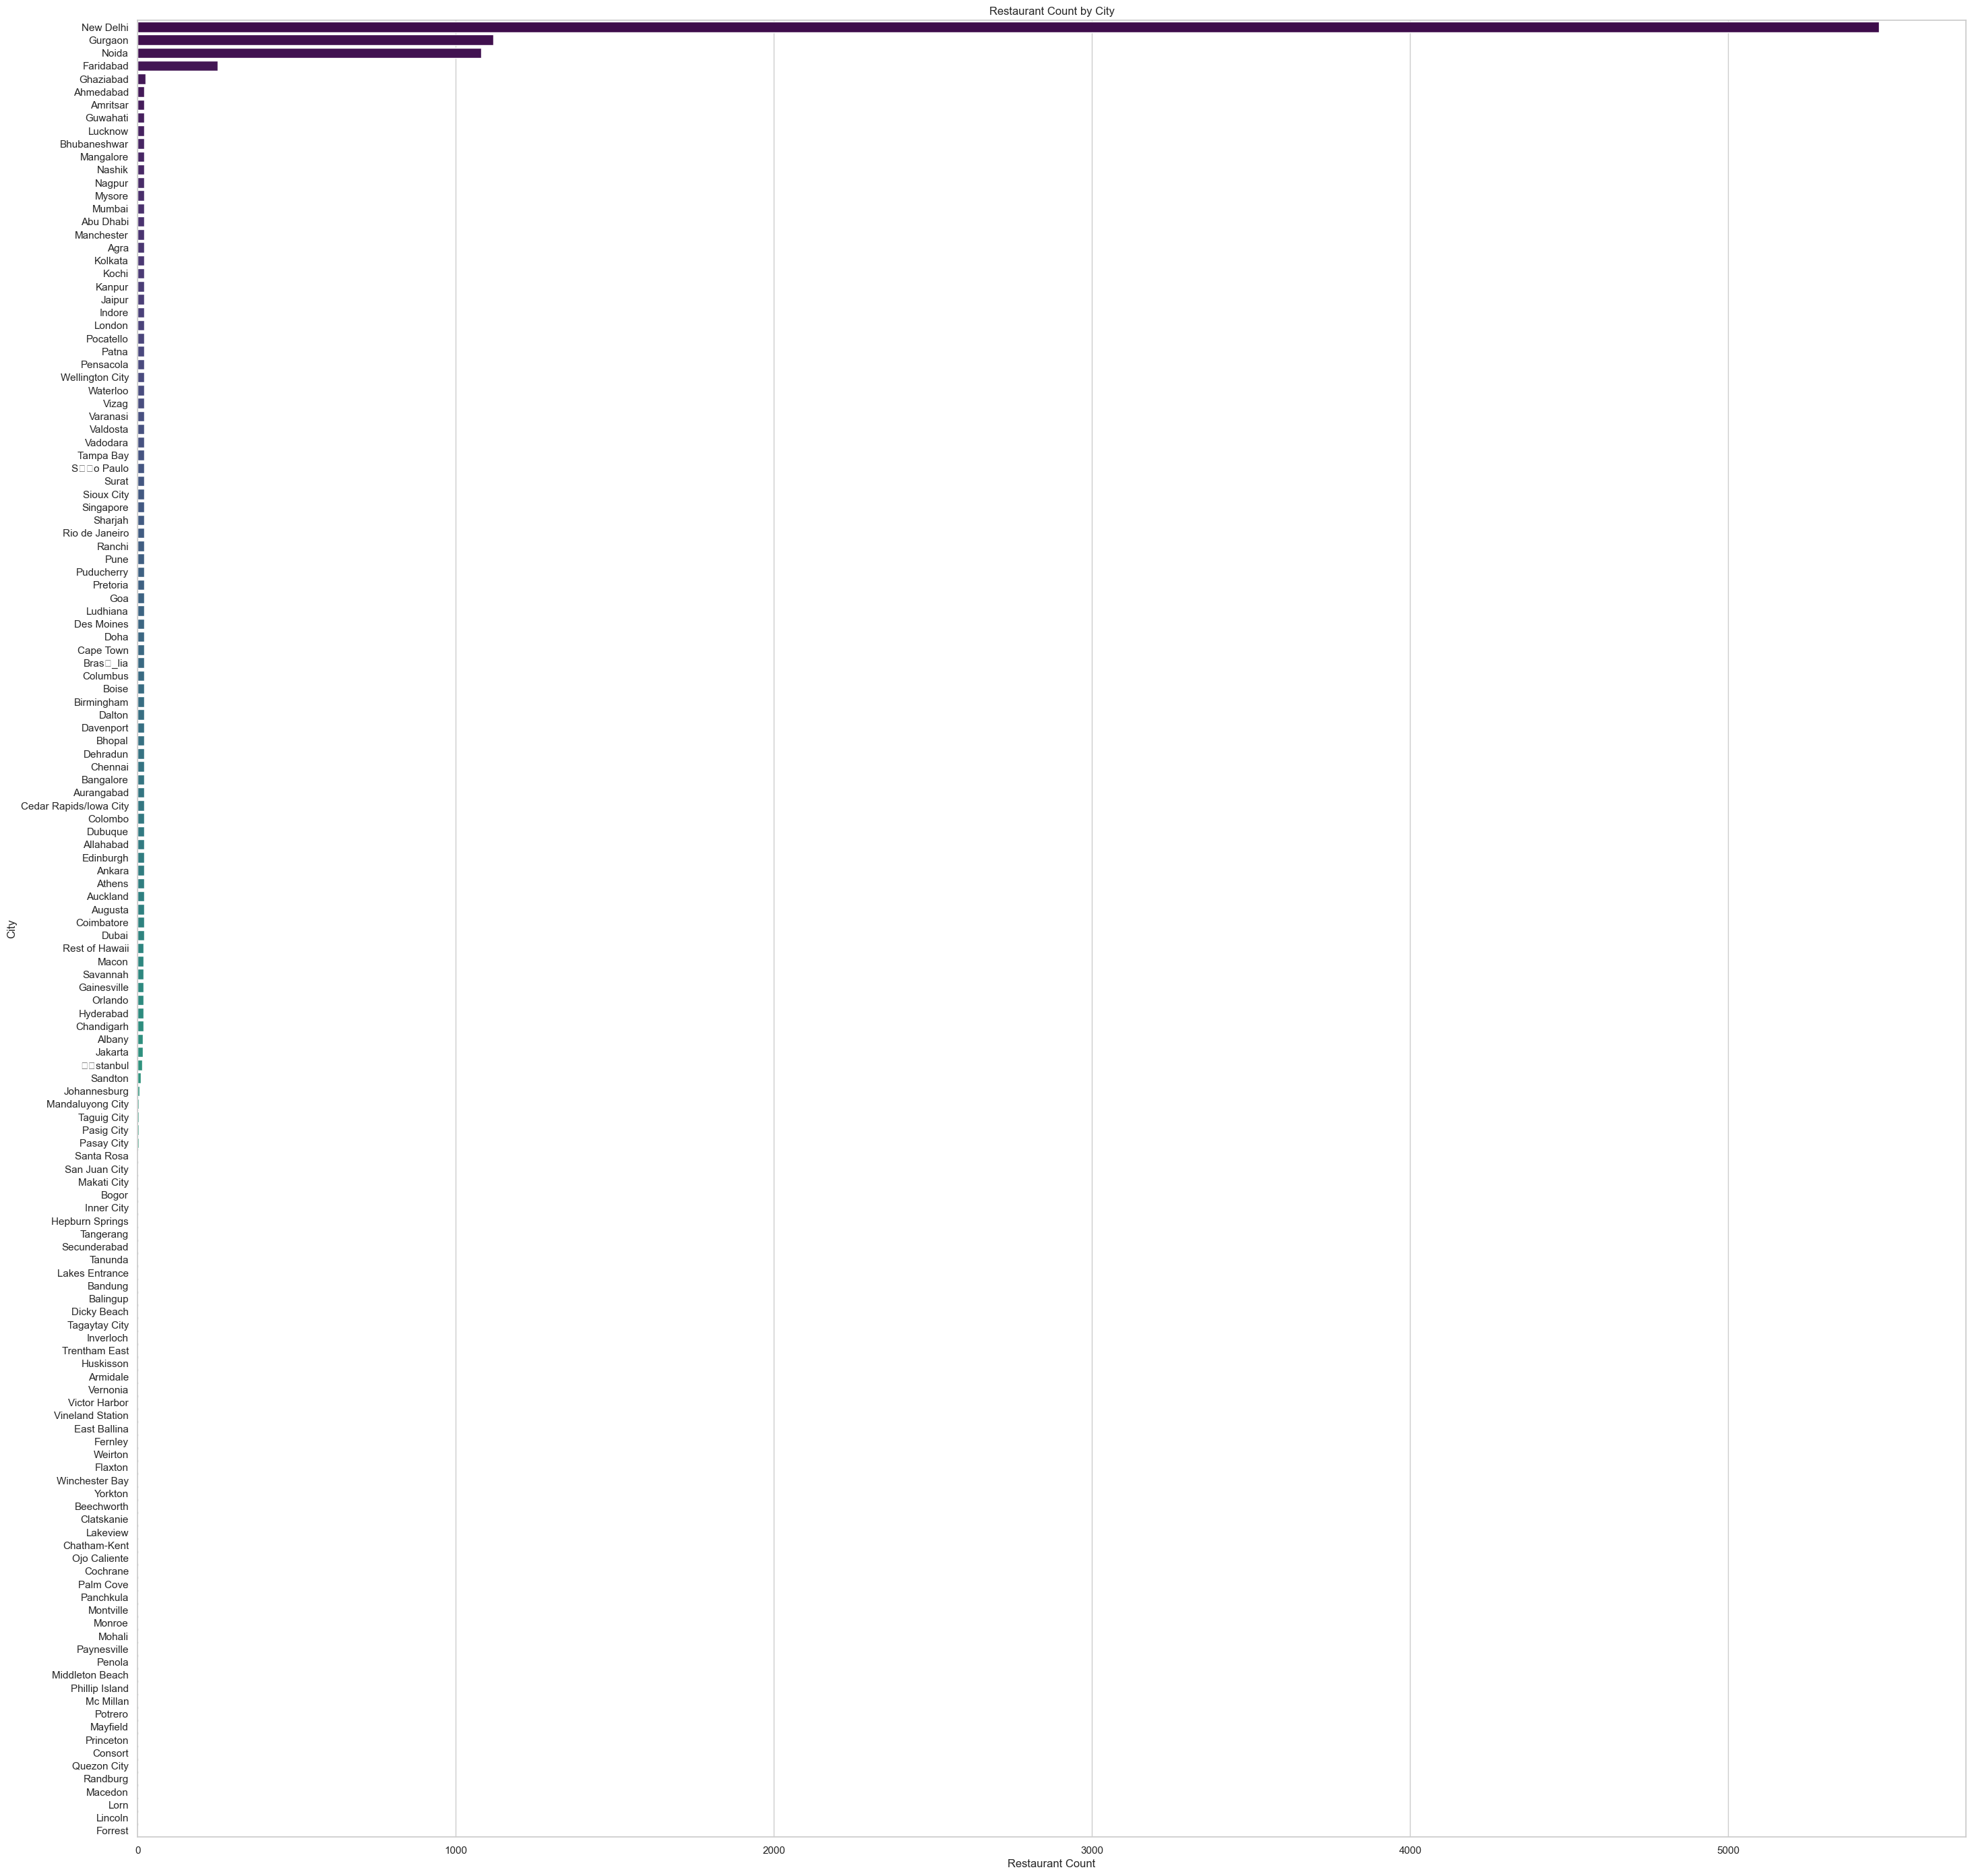

C:\Users\nisha\AppData\Local\Temp\ipykernel_20776\1467848546.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_grouped, x='Avg Rating', y='City', palette='coolwarm')
C:\Users\nisha\PycharmProjects\pythonProject1\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


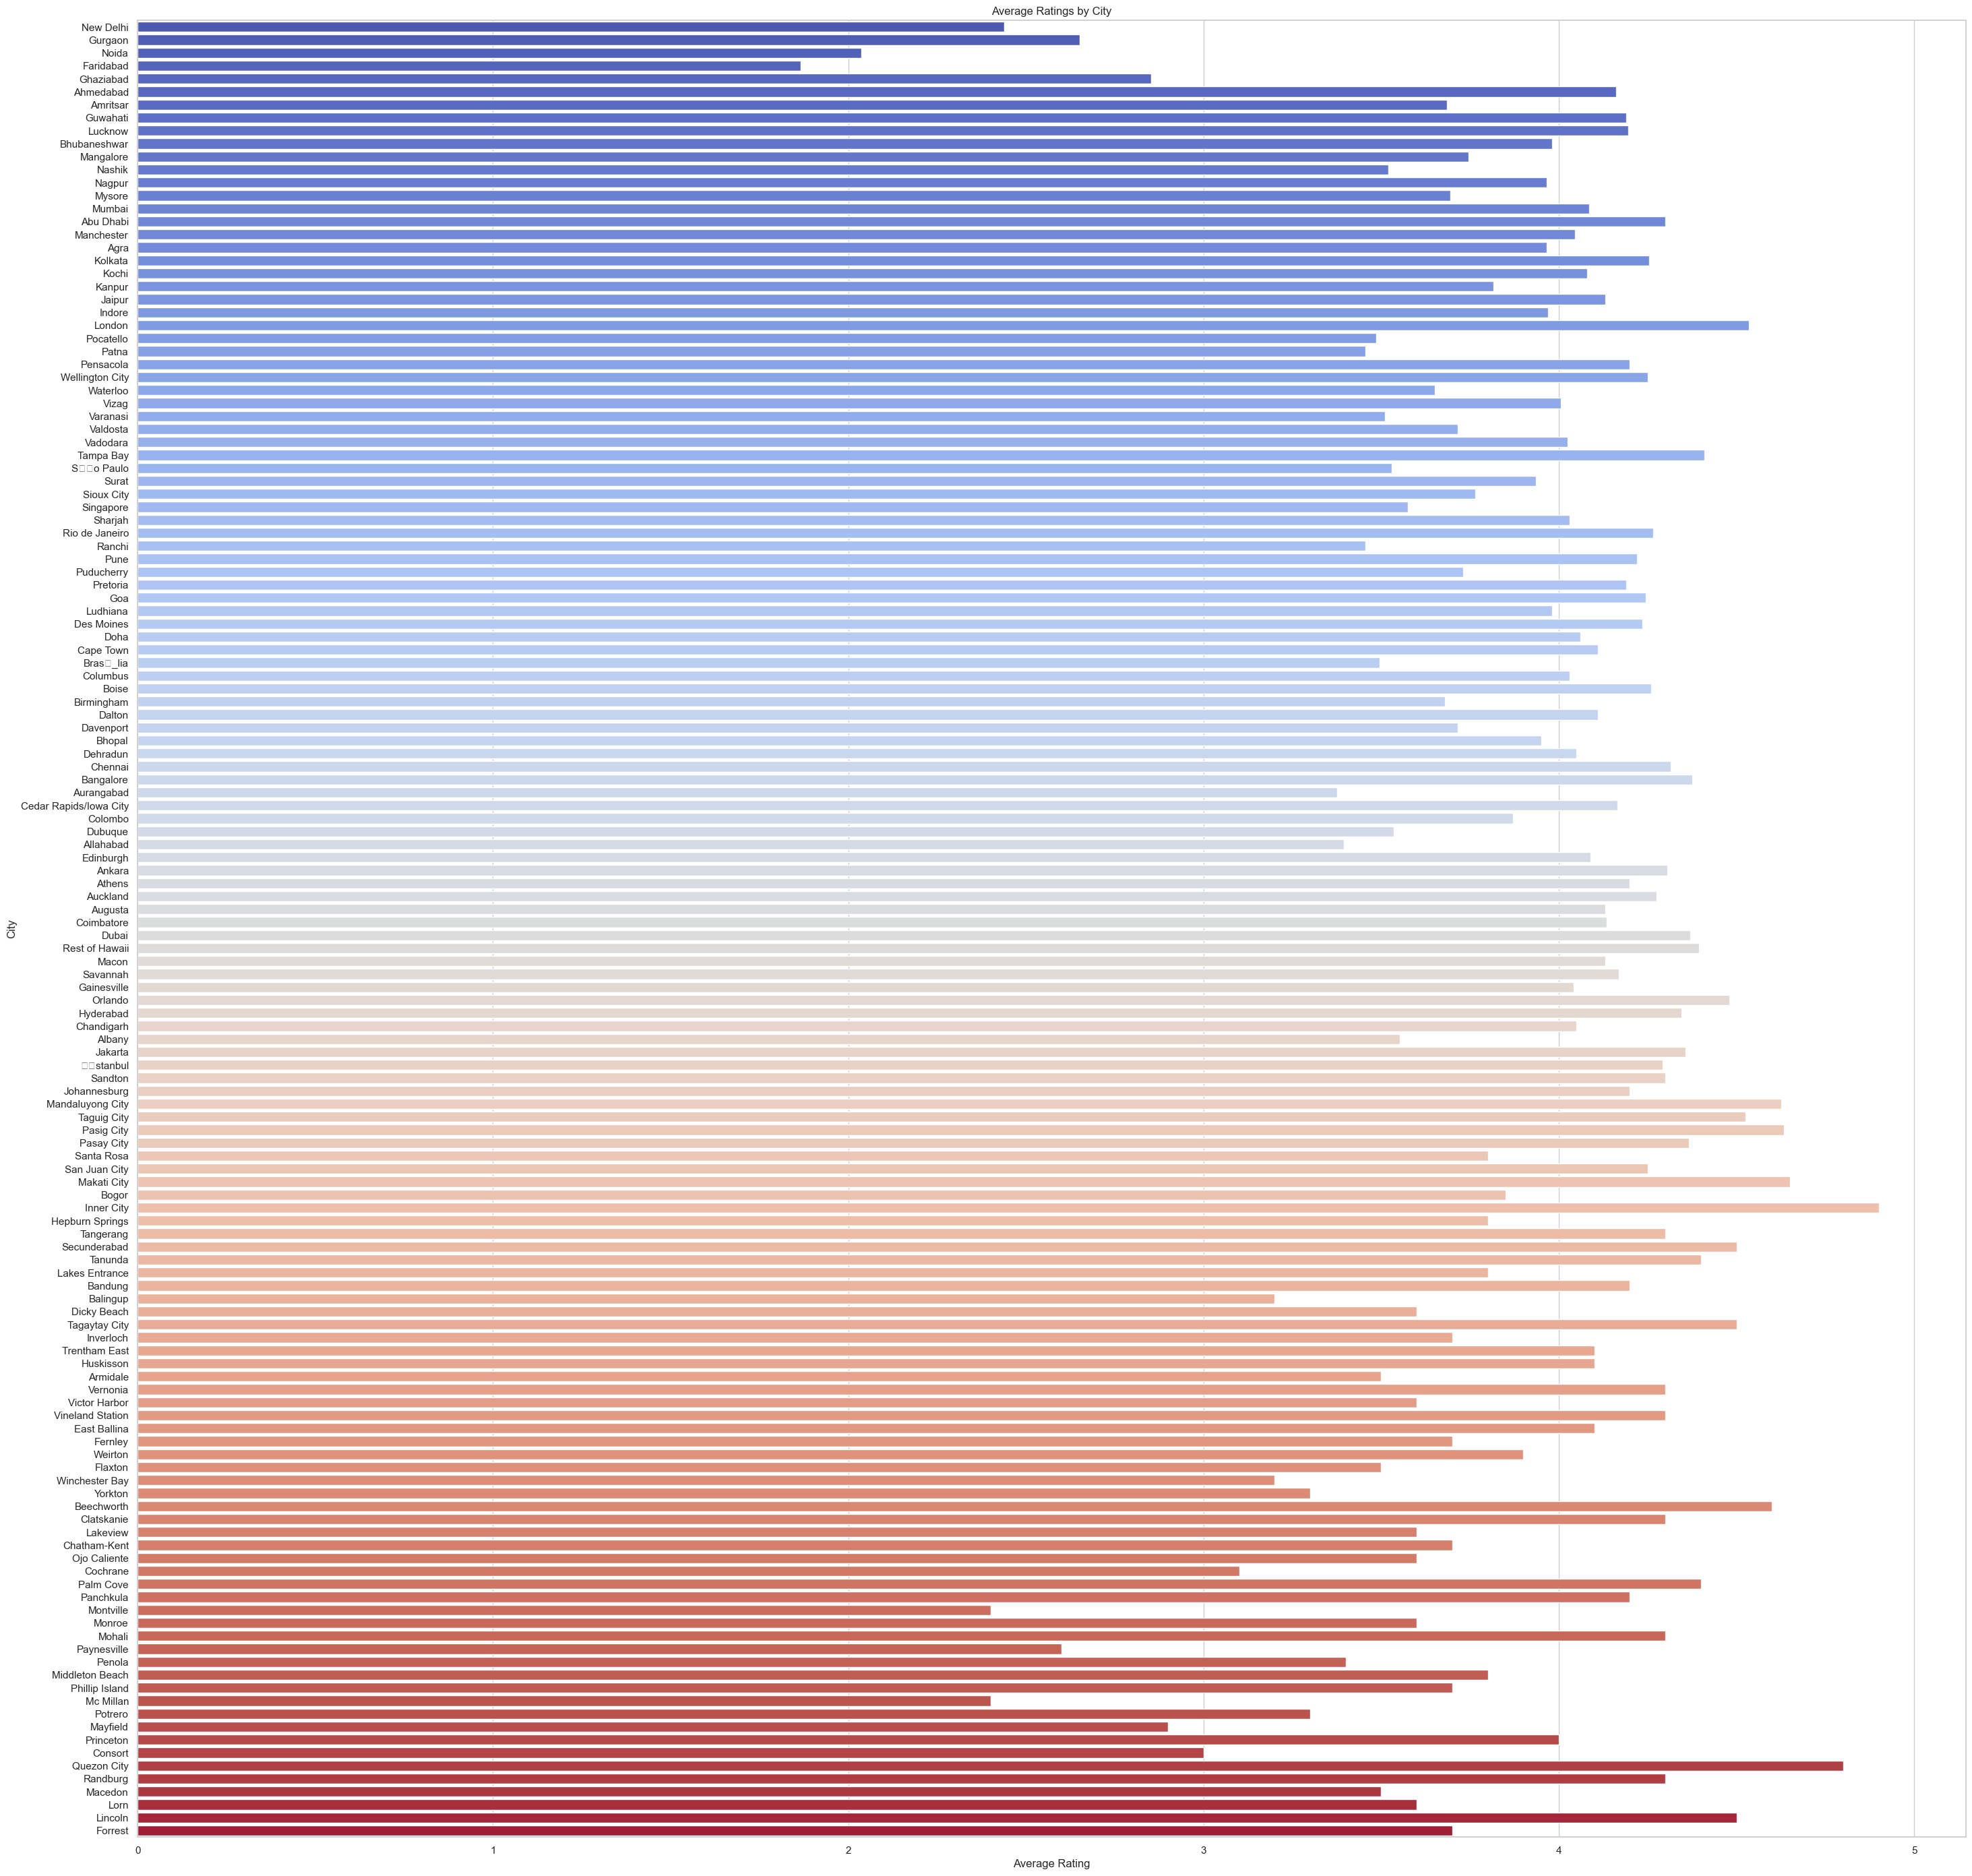

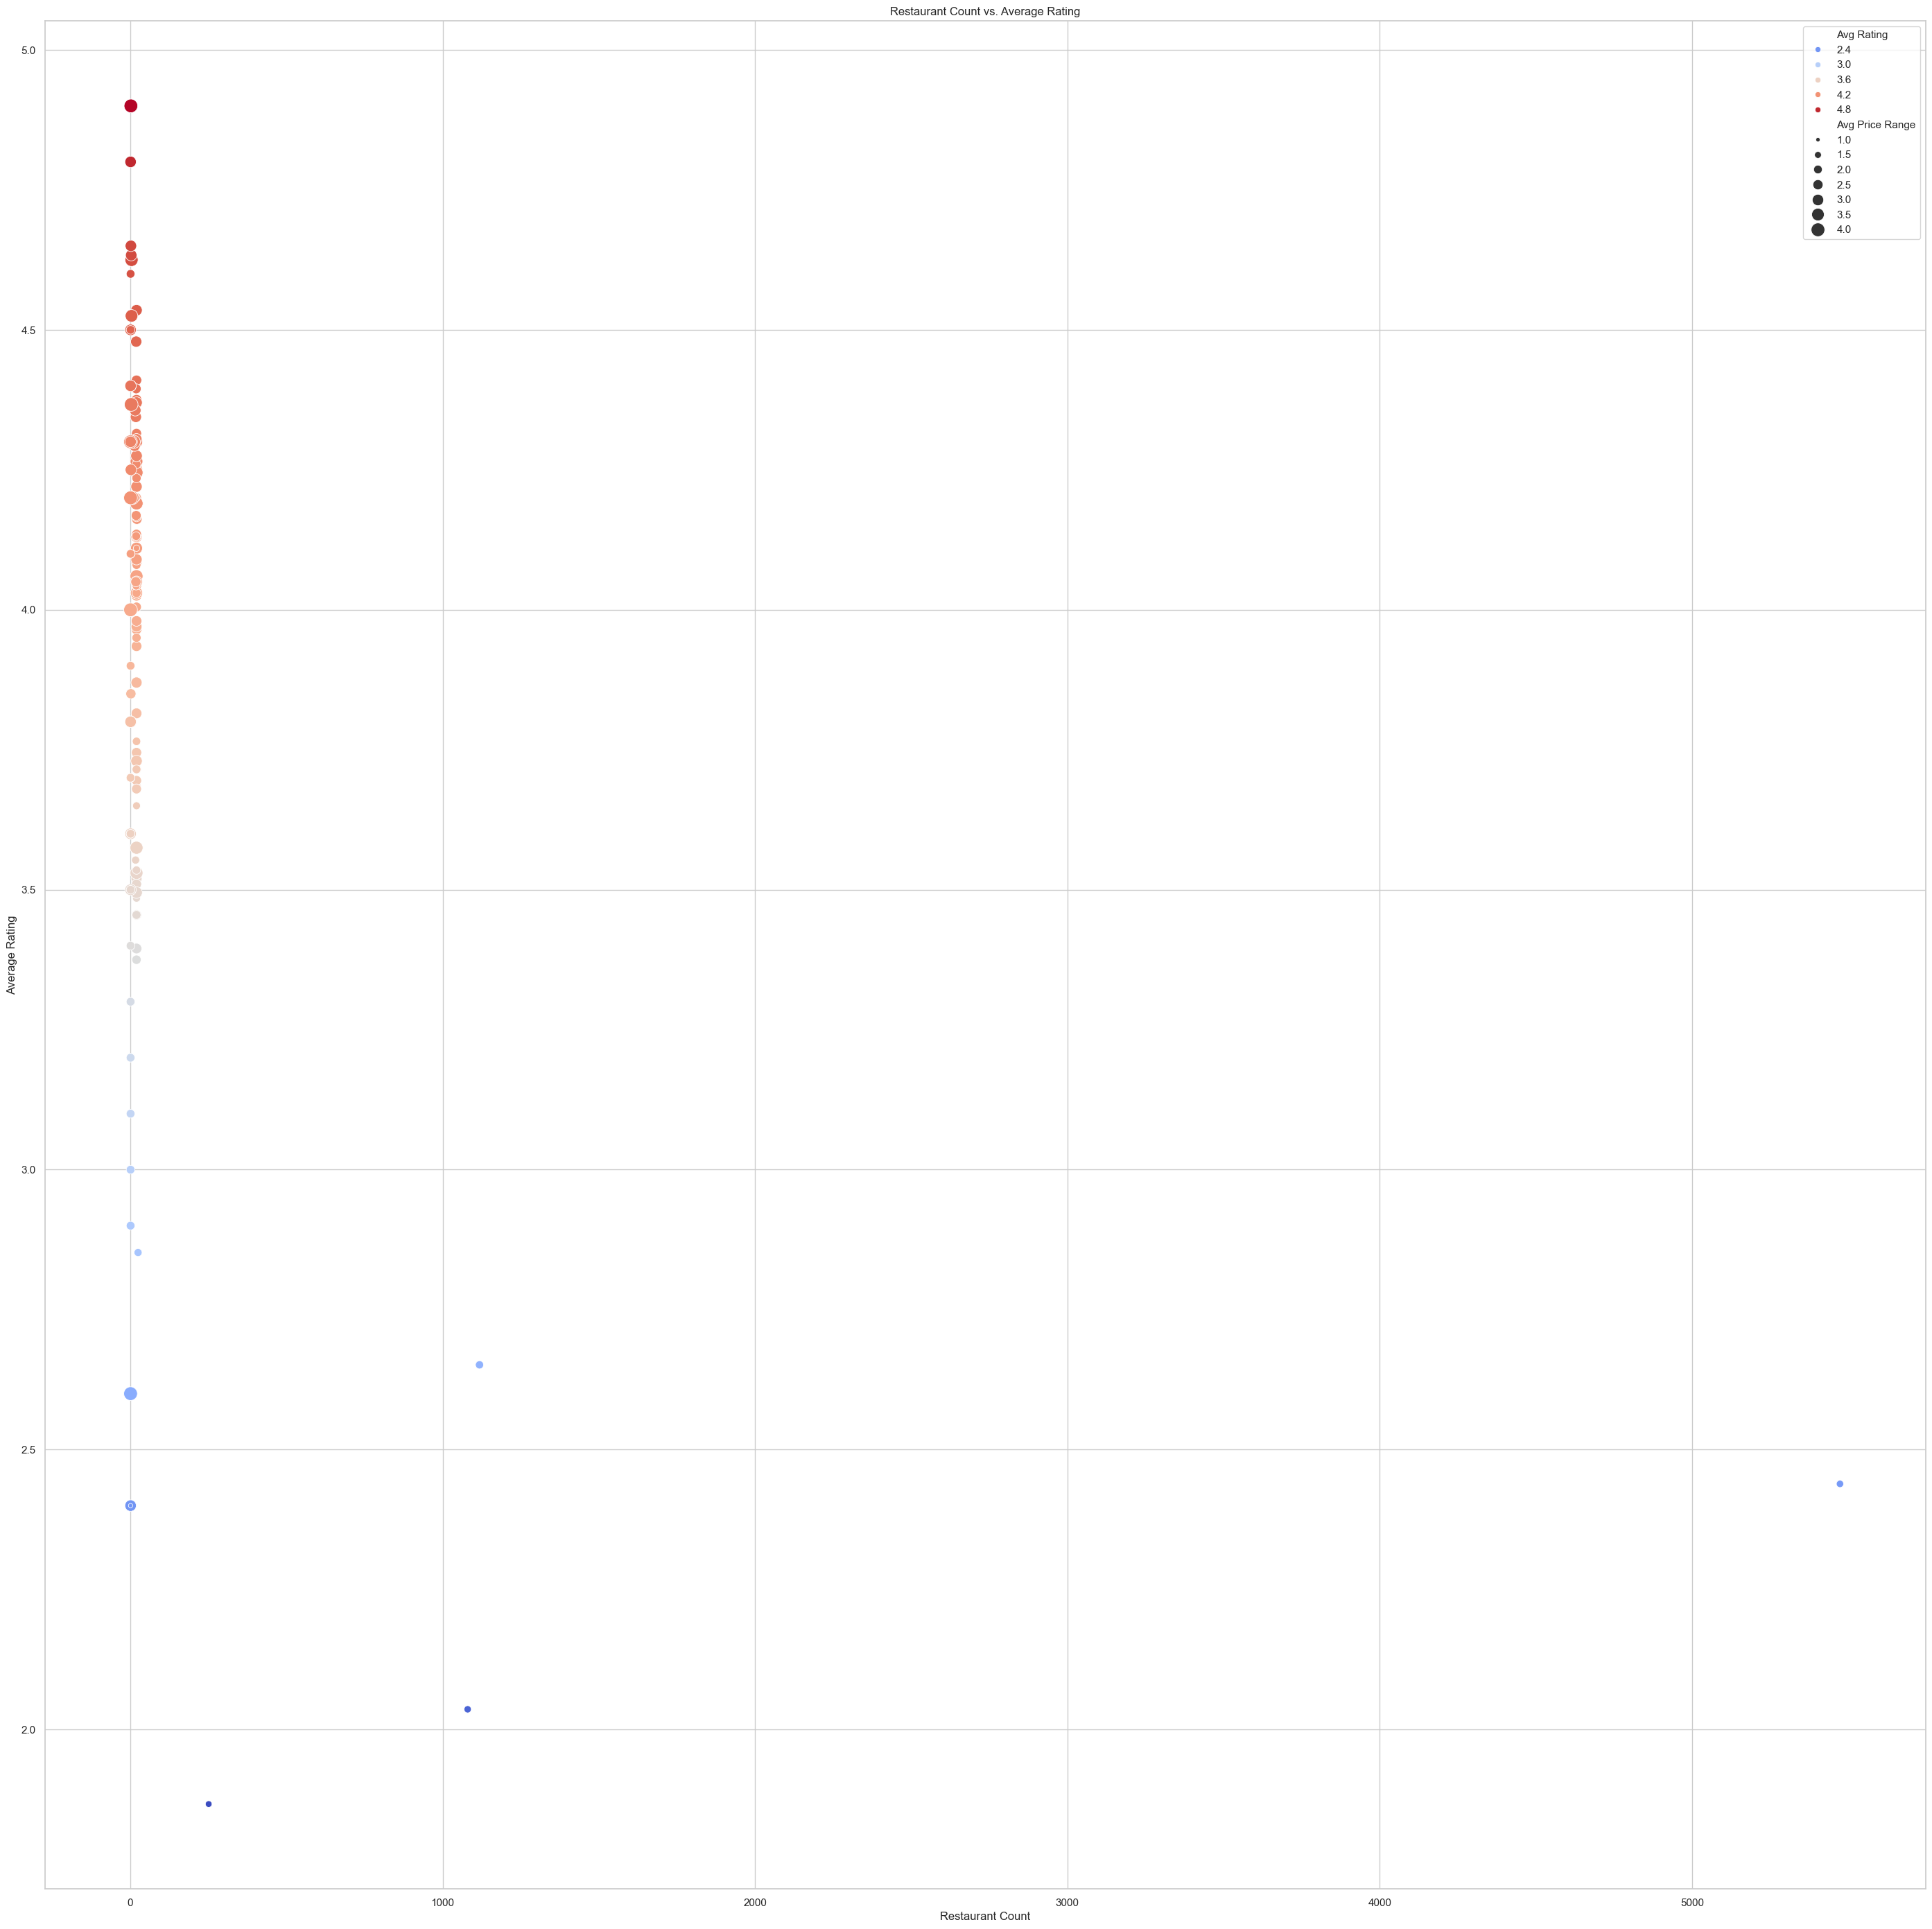

C:\Users\nisha\AppData\Local\Temp\ipykernel_20776\1467848546.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=city_grouped, x='Avg Price Range', y='City', palette='Set2')
C:\Users\nisha\PycharmProjects\pythonProject1\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


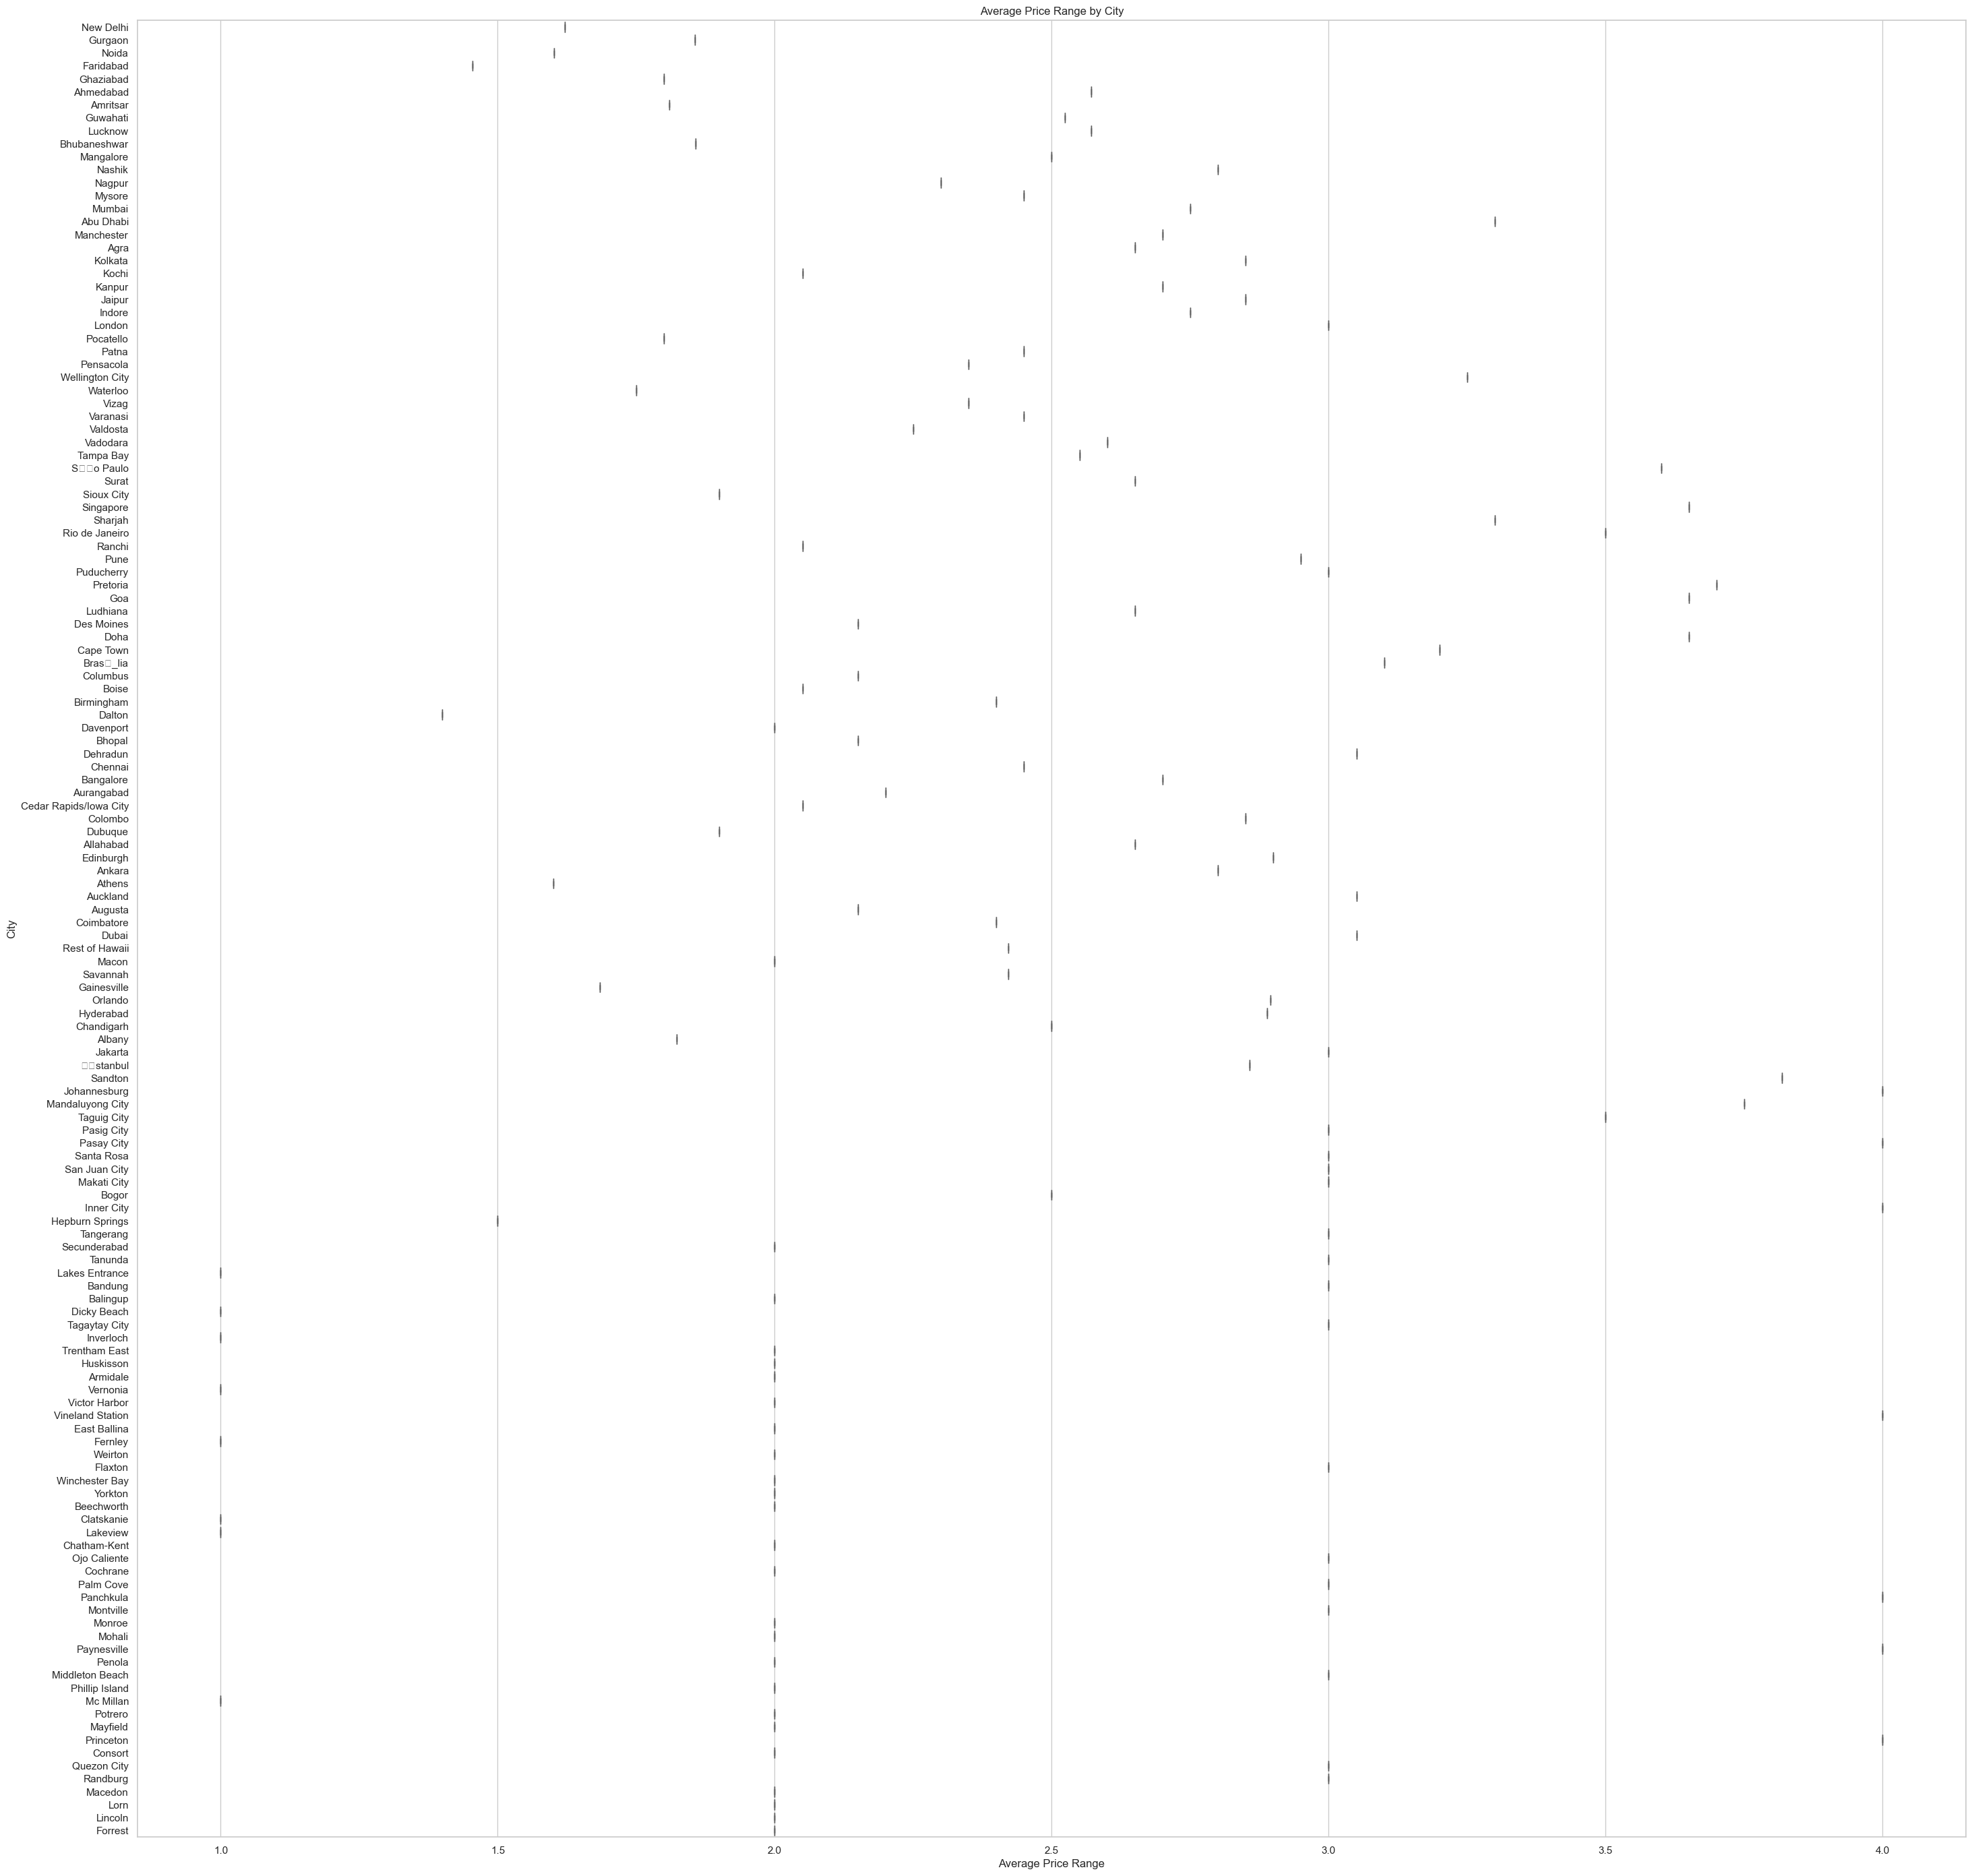

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# 1. Bar Plot for Restaurant Count by City
plt.figure(figsize=(35, 35))
sns.barplot(data=city_grouped, x='Restaurant Count', y='City', palette='viridis')
plt.title('Restaurant Count by City')
plt.xlabel('Restaurant Count')
plt.ylabel('City')
plt.show()

# 2. Bar Plot for Average Ratings by City
plt.figure(figsize=(35, 35))
sns.barplot(data=city_grouped, x='Avg Rating', y='City', palette='coolwarm')
plt.title('Average Ratings by City')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

# 3. Scatter Plot for Restaurant Count vs. Average Rating
plt.figure(figsize=(35, 35))
sns.scatterplot(data=city_grouped, x='Restaurant Count', y='Avg Rating', hue='Avg Rating', 
                palette='coolwarm', size='Avg Price Range', sizes=(20, 200))
plt.title('Restaurant Count vs. Average Rating')
plt.xlabel('Restaurant Count')
plt.ylabel('Average Rating')
plt.show()

# 4. Box Plot for Average Price Range by City
plt.figure(figsize=(35, 35))
sns.boxplot(data=city_grouped, x='Avg Price Range', y='City', palette='Set2')
plt.title('Average Price Range by City')
plt.xlabel('Average Price Range')
plt.ylabel('City')
plt.show()


## The above images and statistic gives a overview about the various distribution of restaurants according to the dataset and give a clear analysis about the various ratings, concentrations and value for money about different locality/cities 